# abalone

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [3]:
# loading the dataset
ab = pd.read_csv('abalone.csv')
# first 5 rows of the dataset
ab.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
ab.shape

(4177, 9)

In [5]:
ab.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [6]:
ab.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [11]:
ab.drop('Sex', axis=1, inplace=True)

In [12]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


In [13]:
ab.isnull().sum()

Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

# summary statistics

In [14]:
ab.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [15]:
ab.Rings.unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [16]:
ab['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
26      1
29      1
25      1
1       1
2       1
Name: Rings, dtype: int64

# Data visualizations

<AxesSubplot:>

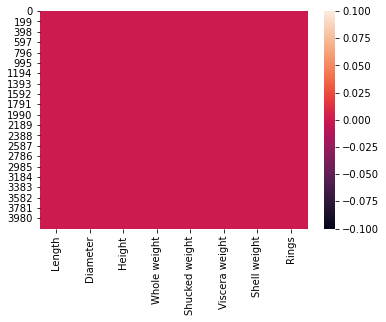

In [17]:
sns.heatmap(ab.isnull())

# correlation

In [18]:
ab_corr = ab.corr()
ab_corr

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

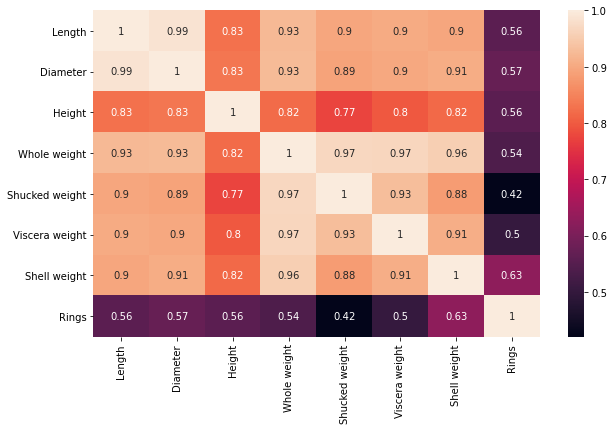

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(ab_corr,annot=True)

<AxesSubplot:>

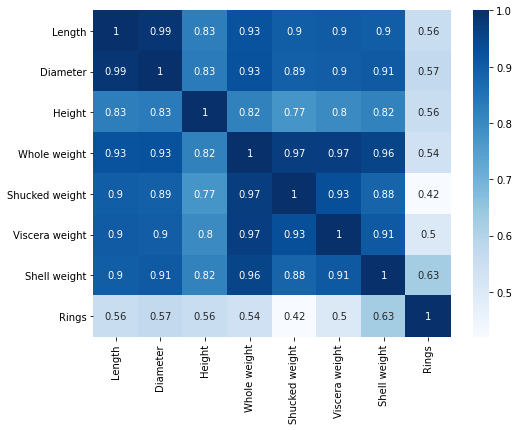

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(ab_corr,cmap='Blues',annot=True)

# Plotting Outliers

<AxesSubplot:>

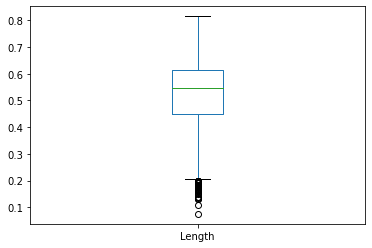

In [21]:
ab['Length'].plot.box()

<AxesSubplot:>

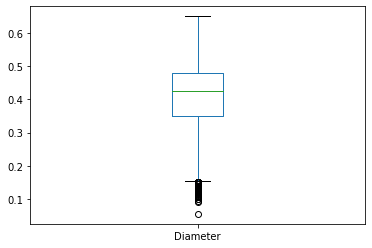

In [22]:
ab['Diameter'].plot.box()

<AxesSubplot:>

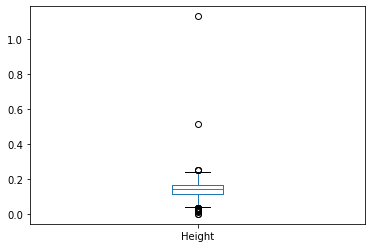

In [23]:
ab['Height'].plot.box()

<AxesSubplot:>

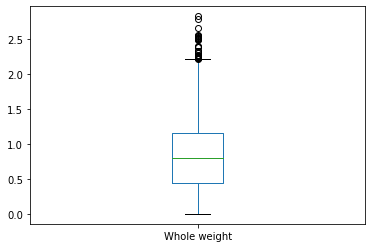

In [24]:
ab['Whole weight'].plot.box()

<AxesSubplot:>

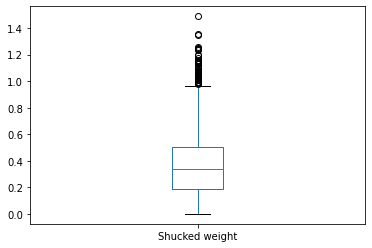

In [25]:
ab['Shucked weight'].plot.box()

<AxesSubplot:>

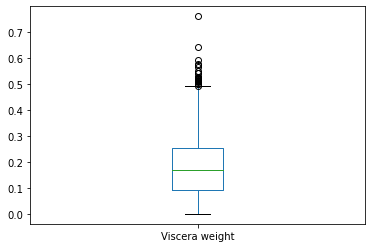

In [26]:
ab['Viscera weight'].plot.box()

<AxesSubplot:>

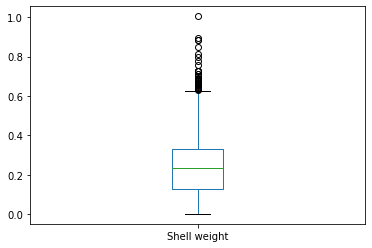

In [27]:
ab['Shell weight'].plot.box()

<AxesSubplot:>

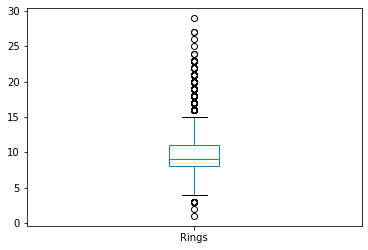

In [28]:
ab['Rings'].plot.box()

Length               AxesSubplot(0.125,0.536818;0.168478x0.343182)
Diameter          AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Height            AxesSubplot(0.529348,0.536818;0.168478x0.343182)
Whole weight      AxesSubplot(0.731522,0.536818;0.168478x0.343182)
Shucked weight          AxesSubplot(0.125,0.125;0.168478x0.343182)
Viscera weight       AxesSubplot(0.327174,0.125;0.168478x0.343182)
Shell weight         AxesSubplot(0.529348,0.125;0.168478x0.343182)
Rings                AxesSubplot(0.731522,0.125;0.168478x0.343182)
dtype: object

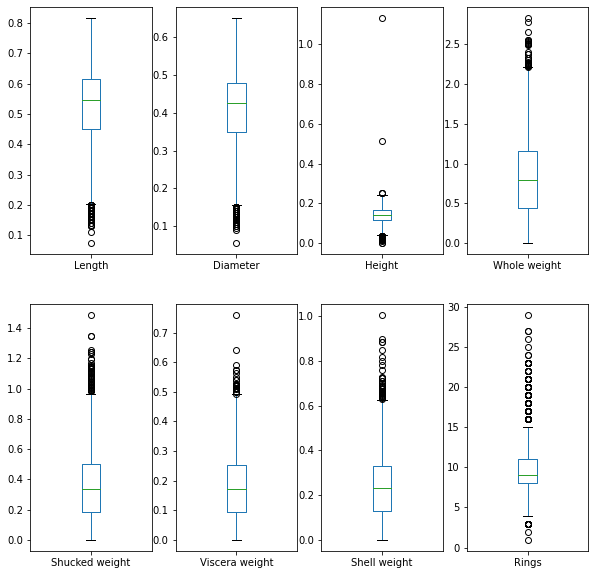

In [29]:
ab.plot(kind='box',subplots=True,layout=(2,4),figsize=(10,10))

# checking skewness

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

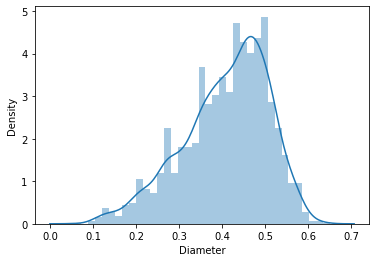

In [30]:
sns.distplot(ab['Diameter'])

<AxesSubplot:xlabel='Height', ylabel='Density'>

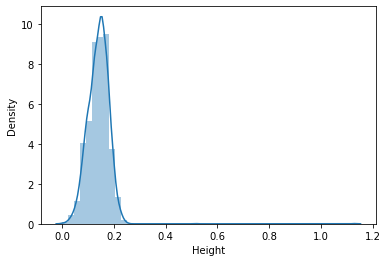

In [31]:
sns.distplot(ab['Height'])

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

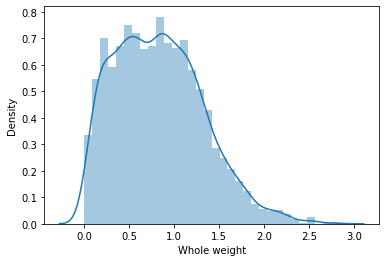

In [32]:
sns.distplot(ab['Whole weight'])

<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

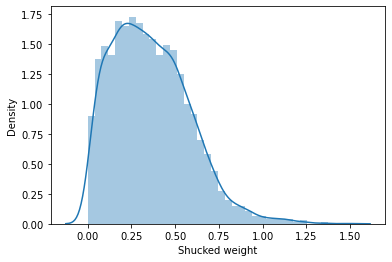

In [33]:
sns.distplot(ab['Shucked weight'])

<AxesSubplot:xlabel='Viscera weight', ylabel='Density'>

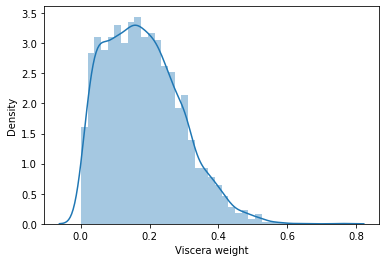

In [34]:
sns.distplot(ab['Viscera weight'])

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

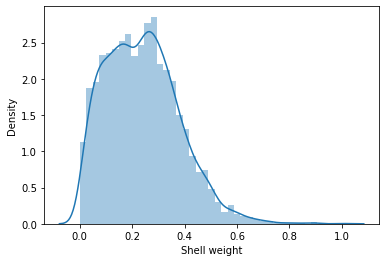

In [35]:
sns.distplot(ab['Shell weight'])

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

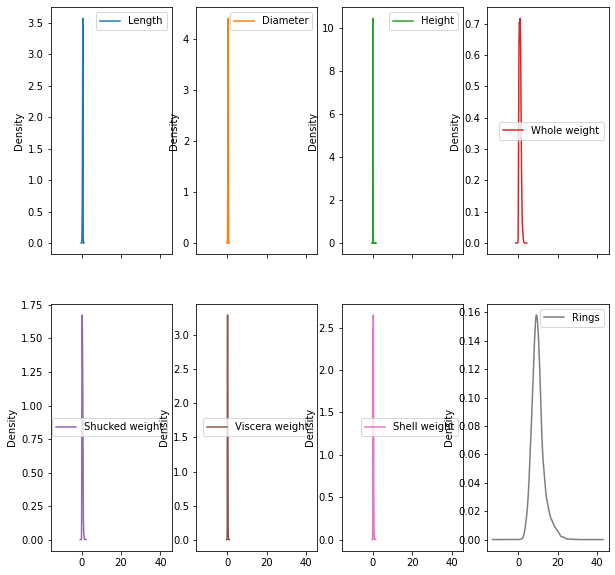

In [36]:
ab.plot(kind='kde', subplots=True, layout=(2,4), figsize=(10,10))

# Scatterplots

<AxesSubplot:xlabel='Length', ylabel='Rings'>

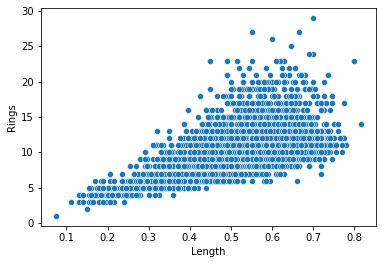

In [37]:
sns.scatterplot(x='Length',y = 'Rings', data=ab)

<AxesSubplot:xlabel='Diameter', ylabel='Rings'>

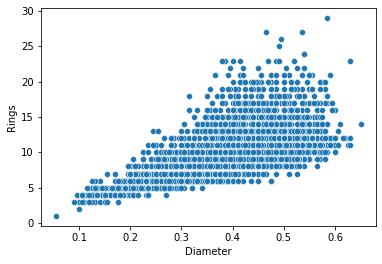

In [38]:
sns.scatterplot(x='Diameter', y ='Rings',data=ab)

<AxesSubplot:xlabel='Height', ylabel='Rings'>

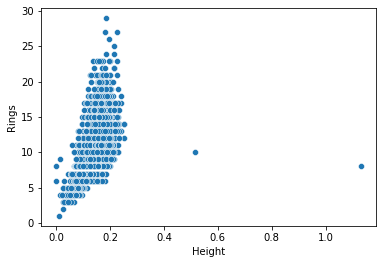

In [39]:
sns.scatterplot(x='Height',y='Rings',data=ab)

<AxesSubplot:xlabel='Whole weight', ylabel='Rings'>

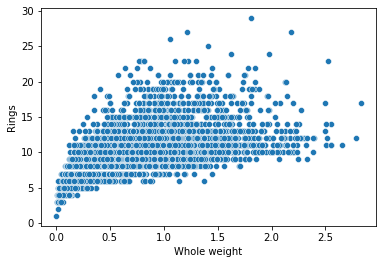

In [40]:
sns.scatterplot(x='Whole weight',y ='Rings',data=ab)

<AxesSubplot:xlabel='Shucked weight', ylabel='Rings'>

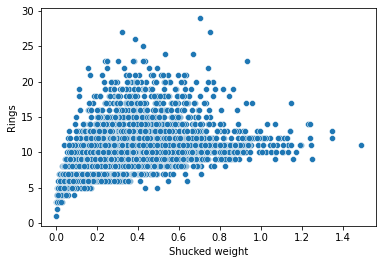

In [41]:
sns.scatterplot(x='Shucked weight' ,y='Rings',data=ab)

<AxesSubplot:xlabel='Viscera weight', ylabel='Rings'>

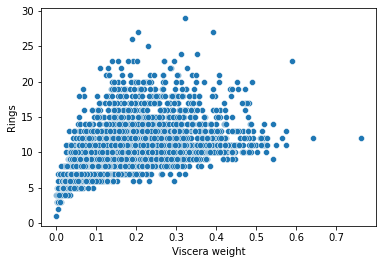

In [42]:
sns.scatterplot(x='Viscera weight' , y='Rings',data=ab)

<AxesSubplot:xlabel='Shell weight', ylabel='Rings'>

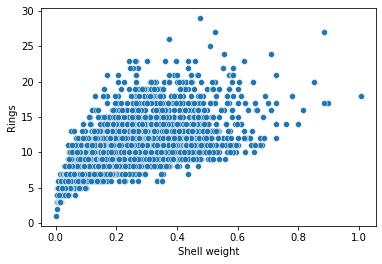

In [43]:
sns.scatterplot(x= 'Shell weight', y='Rings',data=ab)

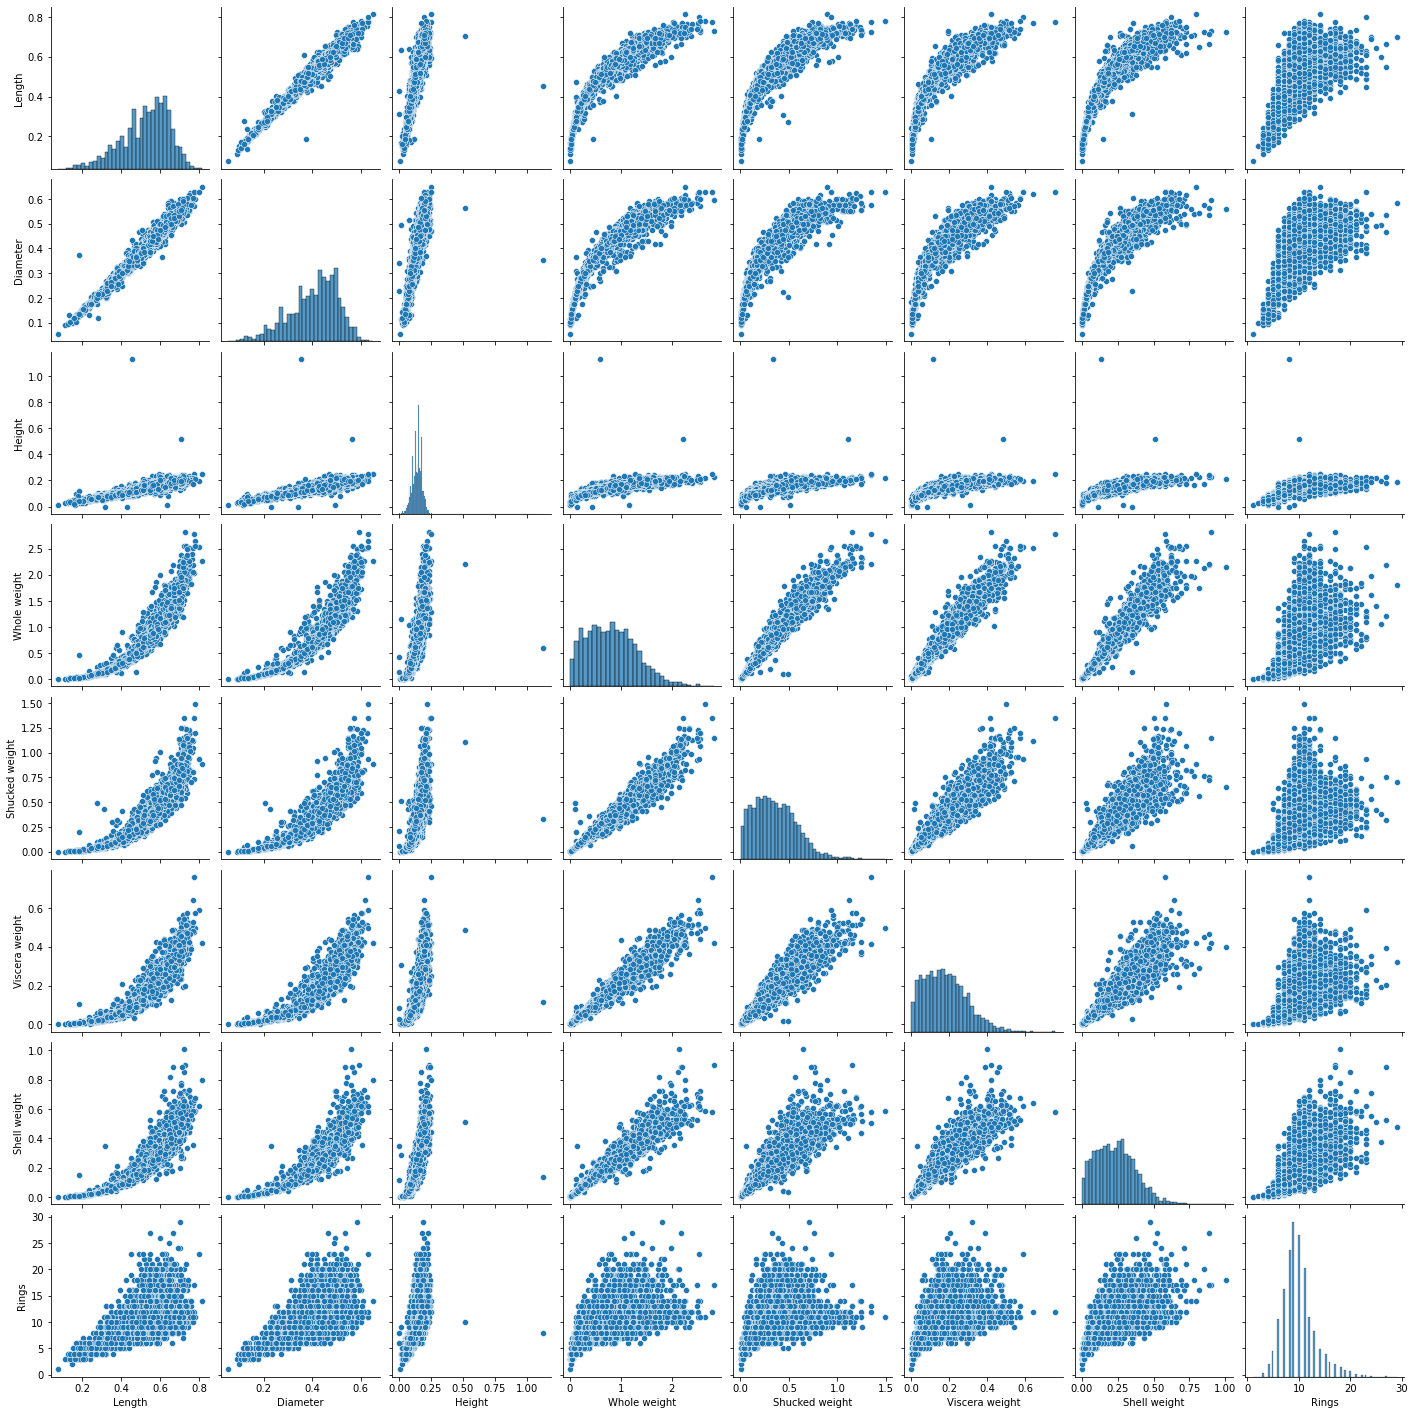

In [45]:
sns.pairplot(ab)

In [46]:
ab.corr()['Rings']

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

# Removing outliers

In [47]:
from scipy.stats import zscore
z = np.abs(zscore(ab))
z

array([[0.57455813, 0.43214879, 1.06442415, ..., 0.72621157, 0.63821689,
        1.57154357],
       [1.44898585, 1.439929  , 1.18397831, ..., 1.20522124, 1.21298732,
        0.91001299],
       [0.05003309, 0.12213032, 0.10799087, ..., 0.35668983, 0.20713907,
        0.28962385],
       ...,
       [0.6329849 , 0.67640943, 1.56576738, ..., 0.97541324, 0.49695471,
        0.28962385],
       [0.84118198, 0.77718745, 0.25067161, ..., 0.73362741, 0.41073914,
        0.02057072],
       [1.54905203, 1.48263359, 1.32665906, ..., 1.78744868, 1.84048058,
        0.64095986]])

In [48]:
threshold =3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [49]:
len(np.where(z>3)[0])

200

In [50]:
ab.drop([7, 7, 6, 7, 6, 6, 6, 3, 4, 6, 6, 7, 7, 6, 5, 7, 7, 0, 1, 2, 0, 1,
       0, 1, 0, 7, 7, 6, 7, 7, 7, 7, 7, 6, 7, 7, 3, 6, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 0, 1, 7, 7, 7, 7, 7, 7, 7, 1, 0, 1, 0, 1, 0, 1, 7,
       7, 7, 7, 3, 4, 6, 5, 3, 4, 3, 4, 4, 4, 4, 5, 4, 5, 3, 4, 5, 6, 3,
       4, 2, 2, 4, 4, 5, 4, 3, 4, 5, 6, 0, 1, 4, 4, 4, 5, 5, 4, 3, 4, 5,
       3, 4, 5, 4, 4, 0, 0, 1, 2, 6, 6, 7, 0, 1, 6, 6, 7, 7, 7, 7, 6, 7,
       6, 7, 7, 3, 5, 7, 7, 7, 7, 6, 0, 7, 7, 7, 4, 3, 3, 4, 5, 4, 5, 4,
       5, 4, 5, 3, 4, 5, 4, 3, 4, 5, 4, 6, 7, 6, 6, 7, 6, 7, 6, 7, 7, 7,
       3, 4, 5, 3, 4, 5, 4, 3, 4, 5, 6, 3, 1, 0, 1, 0, 7, 7, 7, 4, 4, 2,
       6, 5])

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
8,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
9,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19
10,0.525,0.380,0.140,0.6065,0.1940,0.1475,0.2100,14
11,0.430,0.350,0.110,0.4060,0.1675,0.0810,0.1350,10
12,0.490,0.380,0.135,0.5415,0.2175,0.0950,0.1900,11
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [51]:
ab_new = ab[(z<3).all(axis=1)]

In [52]:
ab_new.shape

(4027, 8)

In [53]:
ab.shape

(4177, 8)

In [55]:
# independent columns
x=ab.iloc[:,:-1]
#target
y=ab.iloc[:,-1]

# Remove skewness

In [56]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')
x

array([[-0.68550213, -0.54986033, -1.12451192, ..., -0.54098937,
        -0.69328289, -0.587809  ],
       [-1.39634403, -1.38733299, -1.26439579, ..., -1.31166208,
        -1.33295268, -1.33241968],
       [-0.07077438,  0.00853714, -0.06482301, ..., -0.36611642,
        -0.25513514, -0.09826193],
       ...,
       [ 0.59336612,  0.64519089,  1.56508168, ...,  0.83813658,
         1.01560749,  0.59839786],
       [ 0.85337516,  0.76992788,  0.30708344, ...,  0.85873857,
         0.81518436,  0.51914542],
       [ 1.83447784,  1.72628889,  1.34794324, ...,  2.10364827,
         1.61134422,  1.65848824]])

# Finding best random state

In [58]:
from sklearn.linear_model import LogisticRegression

maxAccu = 0
maxRS = 0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    predrf = lr.predict(x_test)
    acc = accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print('Best accuracy is ',maxAccu,'on Random_state',maxRS)

Best accuracy is  0.3014354066985646 on Random_state 76


# DecisionTreeClassifier

In [86]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .20,random_state =76)

In [87]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

pred = dtc.predict(x_test)
print('Accuracy ::',accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy :: 20.095693779904305
[[ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  1  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  1  4  8  2  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  1  5  5  5  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  2  6 15 12  6  3  6  1  0  1  0  0  0  1  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  1  9 16 15 15  6 10  3  2  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  7 17 34 25  9 15  2  4  0  1  0  0  1  1  0  0  0  1  0  0
   0  0  0]
 [ 0  0  0  2  0 11 20 40 29 24  8  3  4  1  1  2  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  2  3  7 11 36 20 26  7  8  3  4  0  2  3  0  1  0  0  1  0  0
   0  0  0]
 [ 0  0  0  0  1  6  6 18 21 24  6  6  2  4  1  0  2  3  0  0  0  0  1  0
   0  0  1]
 [ 0  0  0  0  0  3  1 13 16  8  1  4  2  2  1  0  2  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  2 

# RandomForestClassifier

In [61]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier()
rm.fit(x_train,y_train)
pred1 = rm.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred1)*100)
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))

Accuracy 25.279106858054227
[[ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  8  9  4  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  3 11 10  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0 17 26 29 10  5  1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
   0]
 [ 0  0  1  4 27 28 29 14  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  2 13 28 60 59 15  5  2  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  1  5 15 28 68 58 22  5  1  0  0  0  1  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  9 18 50 63 31  7  4  3  0  1  0  1  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  1  2 11 32 42 41  9  6  2  2  2  3  0  0  1  0  0  0  0  0
   0]
 [ 0  0  0  0  0  2  6 14 19 14  9  2  5  1  1  1  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  1  0  4 10 17 12  5  3  2  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  

# SVC

In [62]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
pred2 = svc.predict(x_test)
print('Accuracy',accuracy_score(y_test,pred2)*100)
print(confusion_matrix(y_test,pred2))
print(classification_report(y_test,pred2))

Accuracy 26.475279106858054
[[ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  4  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  5 14  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  2 13 10  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0 13 20 46  8  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  5 20 50 22 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  2  2 39 55 81  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  2 22 30 88 51 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0 12 15 62 64 33  0  1  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  9  8 44 56 37  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  1  8 20 25 19  0  1  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  2  3 15 23 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  

# LogisticRegression

In [63]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
pred3 = lr.predict(x_test)
print('Accuracy',accuracy_score(y_test,pred3)*100)
print(confusion_matrix(y_test,pred3))
print(classification_report(y_test, pred3))

Accuracy 26.87400318979266
[[ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  3  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  2 17  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  2 11 12  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  1  0  9 24 42  8  2  2  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  5 19 41 25 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  2  2 31 65 71 11  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  1 18 33 85 48 18  0  1  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0 11 12 55 64 37  1  7  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  4  8 36 59 39  2  5  0  0  1  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  1  5 20 24 19  0  3  0  0  2  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  1  2  9 25 11  0  6  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0

# Cross validation

In [130]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtc,x,y, cv=5)
print(score)
print(score.mean())
print(score.std())

[0.16507177 0.19617225 0.20838323 0.20598802 0.19760479]
0.19464401340858953
0.01551175044392913


# Hyper parameter tuning

In [127]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
parameters = {'criterion': ['gini','entropy']}

GCV = GridSearchCV(estimator=dtc,param_grid=parameters,scoring='accuracy',cv=5)
GCV.fit(x_train,y_train)

best_parameters = GCV.best_params_
print(best_parameters)
best_result = GCV.best_score_
print(best_result)

{'criterion': 'gini'}
0.19454946609024107


# Saving the model in pickle  format

In [133]:
import joblib
joblib.dump(dtc,"abalone.pkl")

['abalone.pkl']